In [1]:
import tensorflow as tf
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from keras.src.layers.pooling.average_pooling2d import AvgPool2D
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import load_img,img_to_array
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.densenet import DenseNet121, DenseNet169, DenseNet201
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as nmp
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
!pip install kaggle

!mkdir ~/.kaggle

!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download dansbecker/food-101

Dataset URL: https://www.kaggle.com/datasets/dansbecker/food-101
License(s): other
100% 9.37G/9.38G [01:48<00:00, 130MB/s] 
100% 9.38G/9.38G [01:48<00:00, 92.9MB/s]


In [4]:
!unzip food-101.zip -d ./food-101

Streaming output truncated to the last 5000 lines.
  inflating: ./food-101/food-101/food-101/images/tacos/1030289.jpg  
  inflating: ./food-101/food-101/food-101/images/tacos/1033196.jpg  
  inflating: ./food-101/food-101/food-101/images/tacos/1036030.jpg  
  inflating: ./food-101/food-101/food-101/images/tacos/1042175.jpg  
  inflating: ./food-101/food-101/food-101/images/tacos/1044043.jpg  
  inflating: ./food-101/food-101/food-101/images/tacos/1058697.jpg  
  inflating: ./food-101/food-101/food-101/images/tacos/1059239.jpg  
  inflating: ./food-101/food-101/food-101/images/tacos/1059326.jpg  
  inflating: ./food-101/food-101/food-101/images/tacos/1066762.jpg  
  inflating: ./food-101/food-101/food-101/images/tacos/1070967.jpg  
  inflating: ./food-101/food-101/food-101/images/tacos/1073468.jpg  
  inflating: ./food-101/food-101/food-101/images/tacos/1075296.jpg  
  inflating: ./food-101/food-101/food-101/images/tacos/1085243.jpg  
  inflating: ./food-101/food-101/food-101/images/tac

# **Classes & Calories**

The calories per gram for each food item:

      Apple Pie: ~2.5 calories per gram

      Baby Back Ribs: ~3.5 calories per gram

      Baklava: ~5 calories per

      Beef Carpaccio: ~2 calories per gram

      Beef Tartare: ~2.5 calories per gram

      Beet Salad: ~0.5 calories per gram

      Beignets: ~3.5 calories per gram

      Bibimbap: ~1.5 calories per gram

      Bread Pudding: ~2.5 calories per gram

      Breakfast Burrito: ~2 calories per gram

      Bruschetta: ~1 calorie per gram

      Caesar Salad: ~0.5 calories per gram

      Cannoli: ~3.5 calories per gram

      Caprese Salad: ~1 calorie per gram

      Carrot Cake: ~3.5 calories per gram

      Ceviche: ~0.5 calories per gram

      Cheese Plate: ~3.5 calories per gram

      Cheesecake: ~3.5 calories per gram

      Chicken Curry: ~1.5 calories per gram

      Chicken Quesadilla: ~2.5 calories per gram

      Chicken Wings: ~3 calories per gram

      Chocolate Cake: ~4 calories per gram

      Chocolate Mousse: ~3 calories per gram

      Churros: ~4 calories per gram

      Clam Chowder: ~1.5 calories per gram

      Club Sandwich: ~2.5 calories per gram

      Crab Cakes: ~2 calories per gram

      Creme Brulee: ~3.5 calories per gram

      Croque Madame: ~3 calories per gram

      Cupcakes: ~3.5 calories per gram

      Deviled Eggs: ~1 calorie per gram

      Donuts: ~4 calories per gram

      Dumplings: ~2.5 calories per gram

      Edamame: ~1 calorie per gram

      Eggs Benedict: ~2.5 calories per gram

      Escargots: ~1 calorie per gram

      Falafel: ~2 calories per gram

      Filet Mignon: ~2.5 calories per gram

      Fish and Chips: ~2.5 calories per gram

      Foie Gras: ~4.5 calories per gram

      French Fries: ~3.5 calories per gram

      French Onion Soup: ~1 calorie per gram

      French Toast: ~2 calories per gram

      Fried Calamari: ~2.5 calories per gram

      Fried Rice: ~1.5 calories per gram

      Frozen Yogurt: ~1 calorie per gram

      Garlic Bread: ~4 calories per gram

      Gnocchi: ~1.5 calories per gram

      Greek Salad: ~0.5 calories per gram

      Grilled Cheese Sandwich: ~3 calories per gram

      Grilled Salmon: ~2 calories per gram

      Guacamole: ~2 calories per gram

      Gyoza: ~2 calories per gram

      Hamburger: ~3.5 calories per gram

      Hot and Sour Soup: ~0.5 calories per gram

      Hot Dog: ~3.5 calories per gram

      Huevos Rancheros: ~2 calories per gram

      Hummus: ~1.5 calories per gram

      Ice Cream: ~2 calories per gram

      Lasagna: ~1.5 calories per gram

      Lobster Bisque: ~1 calorie per gram

      Lobster Roll Sandwich: ~2.5 calories per gram

      Macaroni and Cheese: ~3 calories per gram

      Macarons: ~4 calories per gram

      Miso Soup: ~0.5 calories per gram

      Mussels: ~0.5 calories per gram

      Nachos: ~2.5 calories per gram

      Omelette: ~1.5 calories per gram

      Onion Rings: ~2.5 calories per gram

      Oysters: ~0.5 calories per gram

      Pad Thai: ~2 calories per gram

      Paella: ~1.5 calories per gram

      Pancakes: ~2 calories per gram

      Panna Cotta: ~3.5 calories per gram

      Peking Duck: ~4 calories per gram

      Pho: ~1 calorie per gram

      Pizza: ~2.5 calories per gram

      Pork Chop: ~2.5 calories per gram

      Poutine: ~2.5 calories per gram

      Prime Rib: ~2.5 calories per gram

      Pulled Pork Sandwich: ~2.5 calories per gram

      Ramen: ~1 calorie per gram

      Ravioli: ~1.5 calories per gram

      Red Velvet Cake: ~4 calories per gram

      Risotto: ~1.5 calories per gram

      Samosa: ~2 calories per gram

      Sashimi: ~1 calorie per gram

      Scallops: ~1 calorie per gram

      Seaweed Salad: ~0.5 calories per gram

      Shrimp and Grits: ~2 calories per gram

      Spaghetti Bolognese: ~1.5 calories per gram

      Spaghetti Carbonara: ~2 calories per gram

      Spring Rolls: ~1.5 calories per gram

      Steak: ~2.5 calories per gram

      Strawberry Shortcake: ~3.5 calories per gram

      Sushi: ~1 calorie per gram

      Tacos: ~2 calories per gram

      Takoyaki: ~2.5 calories per gram

      Tiramisu: ~3 calories per gram

      Tuna Tartare: ~1.5 calories per gram

      Waffles: ~2 calories per gram

These values are approximations and can vary based on factors such as ingredients and cooking methods.

In [5]:
print(os.listdir("/content/food-101/food-101/food-101/images/"))

['deviled_eggs', 'fish_and_chips', 'croque_madame', 'dumplings', 'chicken_quesadilla', 'cheese_plate', 'filet_mignon', 'sushi', 'chicken_curry', 'chocolate_cake', 'pho', 'grilled_salmon', 'ramen', 'takoyaki', 'grilled_cheese_sandwich', 'mussels', 'spring_rolls', 'tuna_tartare', 'caesar_salad', 'pad_thai', 'seaweed_salad', 'pork_chop', 'macaroni_and_cheese', 'panna_cotta', 'crab_cakes', 'macarons', 'cup_cakes', 'spaghetti_bolognese', 'miso_soup', 'pizza', 'strawberry_shortcake', 'french_fries', 'guacamole', 'fried_rice', 'huevos_rancheros', 'ravioli', 'churros', 'hot_dog', 'foie_gras', 'breakfast_burrito', 'bruschetta', 'baby_back_ribs', 'beef_carpaccio', 'ice_cream', 'french_toast', 'creme_brulee', 'ceviche', 'chicken_wings', 'caprese_salad', 'shrimp_and_grits', 'garlic_bread', 'clam_chowder', 'cheesecake', 'red_velvet_cake', 'hot_and_sour_soup', 'gyoza', 'nachos', 'cannoli', 'tiramisu', 'hummus', 'frozen_yogurt', 'scallops', 'hamburger', 'omelette', 'onion_rings', 'pulled_pork_sandwic

In [6]:
value = ['macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop', 'guacamole', 'baby_back_ribs', 'mussels', 'beef_carpaccio', 'poutine', 'hot_and_sour_soup', 'seaweed_salad', 'foie_gras', 'dumplings', 'peking_duck', 'takoyaki', 'bibimbap', 'falafel', 'pulled_pork_sandwich', 'lobster_roll_sandwich', 'carrot_cake', 'beet_salad', 'panna_cotta', 'donuts', 'red_velvet_cake', 'grilled_cheese_sandwich', 'cannoli', 'spring_rolls', 'shrimp_and_grits', 'clam_chowder', 'omelette', 'fried_calamari', 'caprese_salad', 'oysters', 'scallops', 'ramen', 'grilled_salmon', 'croque_madame', 'filet_mignon', 'hamburger', 'spaghetti_carbonara', 'miso_soup', 'bread_pudding', 'lasagna', 'crab_cakes', 'cheesecake', 'spaghetti_bolognese', 'cup_cakes', 'creme_brulee', 'waffles', 'fish_and_chips', 'paella', 'macaroni_and_cheese', 'chocolate_mousse', 'ravioli', 'chicken_curry', 'caesar_salad', 'nachos', 'tiramisu', 'frozen_yogurt', 'ice_cream', 'risotto', 'club_sandwich', 'strawberry_shortcake', 'steak', 'churros', 'garlic_bread', 'baklava', 'bruschetta', 'hummus', 'chicken_wings', 'greek_salad', 'tuna_tartare', 'chocolate_cake', 'gyoza', 'eggs_benedict', 'deviled_eggs', 'samosa', 'sushi', 'breakfast_burrito', 'ceviche', 'beef_tartare', 'apple_pie', '.DS_Store', 'huevos_rancheros', 'beignets', 'pizza', 'edamame', 'french_onion_soup', 'hot_dog', 'tacos', 'chicken_quesadilla', 'pho', 'gnocchi', 'pancakes', 'fried_rice', 'cheese_plate', 'onion_rings', 'escargots', 'sashimi', 'pad_thai', 'french_fries']
value.sort()
value = value[1:]
print(value)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

In [7]:
print("Number of classes:",len(value))

Number of classes: 101


In [8]:
s = """Apple Pie: ~2.5 calories per gram
Baby Back Ribs: ~3.5 calories per gram
Baklava: ~5 calories per gram
Beef Carpaccio: ~2 calories per gram
Beef Tartare: ~2.5 calories per gram
Beet Salad: ~0.5 calories per gram
Beignets: ~3.5 calories per gram
Bibimbap: ~1.5 calories per gram
Bread Pudding: ~2.5 calories per gram
Breakfast Burrito: ~2 calories per gram
Bruschetta: ~1 calorie per gram
Caesar Salad: ~0.5 calories per gram
Cannoli: ~3.5 calories per gram
Caprese Salad: ~1 calorie per gram
Carrot Cake: ~3.5 calories per gram
Ceviche: ~0.5 calories per gram
Cheese Plate: ~3.5 calories per gram
Cheesecake: ~3.5 calories per gram
Chicken Curry: ~1.5 calories per gram
Chicken Quesadilla: ~2.5 calories per gram
Chicken Wings: ~3 calories per gram
Chocolate Cake: ~4 calories per gram
Chocolate Mousse: ~3 calories per gram
Churros: ~4 calories per gram
Clam Chowder: ~1.5 calories per gram
Club Sandwich: ~2.5 calories per gram
Crab Cakes: ~2 calories per gram
Creme Brulee: ~3.5 calories per gram
Croque Madame: ~3 calories per gram
Cupcakes: ~3.5 calories per gram
Deviled Eggs: ~1 calorie per gram
Donuts: ~4 calories per gram
Dumplings: ~2.5 calories per gram
Edamame: ~1 calorie per gram
Eggs Benedict: ~2.5 calories per gram
Escargots: ~1 calorie per gram
Falafel: ~2 calories per gram
Filet Mignon: ~2.5 calories per gram
Fish and Chips: ~2.5 calories per gram
Foie Gras: ~4.5 calories per gram
French Fries: ~3.5 calories per gram
French Onion Soup: ~1 calorie per gram
French Toast: ~2 calories per gram
Fried Calamari: ~2.5 calories per gram
Fried Rice: ~1.5 calories per gram
Frozen Yogurt: ~1 calorie per gram
Garlic Bread: ~4 calories per gram
Gnocchi: ~1.5 calories per gram
Greek Salad: ~0.5 calories per gram
Grilled Cheese Sandwich: ~3 calories per gram
Grilled Salmon: ~2 calories per gram
Guacamole: ~2 calories per gram
Gyoza: ~2 calories per gram
Hamburger: ~3.5 calories per gram
Hot and Sour Soup: ~0.5 calories per gram
Hot Dog: ~3.5 calories per gram
Huevos Rancheros: ~2 calories per gram
Hummus: ~1.5 calories per gram
Ice Cream: ~2 calories per gram
Lasagna: ~1.5 calories per gram
Lobster Bisque: ~1 calorie per gram
Lobster Roll Sandwich: ~2.5 calories per gram
Macaroni and Cheese: ~3 calories per gram
Macarons: ~4 calories per gram
Miso Soup: ~0.5 calories per gram
Mussels: ~0.5 calories per gram
Nachos: ~2.5 calories per gram
Omelette: ~1.5 calories per gram
Onion Rings: ~2.5 calories per gram
Oysters: ~0.5 calories per gram
Pad Thai: ~2 calories per gram
Paella: ~1.5 calories per gram
Pancakes: ~2 calories per gram
Panna Cotta: ~3.5 calories per gram
Peking Duck: ~4 calories per gram
Pho: ~1 calorie per gram
Pizza: ~2.5 calories per gram
Pork Chop: ~2.5 calories per gram
Poutine: ~2.5 calories per gram
Prime Rib: ~2.5 calories per gram
Pulled Pork Sandwich: ~2.5 calories per gram
Ramen: ~1 calorie per gram
Ravioli: ~1.5 calories per gram
Red Velvet Cake: ~4 calories per gram
Risotto: ~1.5 calories per gram
Samosa: ~2 calories per gram
Sashimi: ~1 calorie per gram
Scallops: ~1 calorie per gram
Seaweed Salad: ~0.5 calories per gram
Shrimp and Grits: ~2 calories per gram
Spaghetti Bolognese: ~1.5 calories per gram
Spaghetti Carbonara: ~2 calories per gram
Spring Rolls: ~1.5 calories per gram
Steak: ~2.5 calories per gram
Strawberry Shortcake: ~3.5 calories per gram
Sushi: ~1 calorie per gram
Tacos: ~2 calories per gram
Takoyaki: ~2.5 calories per gram
Tiramisu: ~3 calories per gram
Tuna Tartare: ~1.5 calories per gram
Waffles: ~2 calories per gram
"""
kcal = s.splitlines()
s = "These values are approximations and can vary based on factors such as ingredients and cooking methods."

In [9]:
len(kcal)

101

In [10]:
kcal[0]

'Apple Pie: ~2.5 calories per gram'

In [11]:
print("First element:",value[0],"\nLast element:",value[-1])

First element: apple_pie 
Last element: waffles


In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)
train_data = train_datagen.flow_from_directory('/content/food-101/food-101/food-101/images',
                                               target_size=(224,224),
                                               batch_size=100,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')
test_data = train_datagen.flow_from_directory('/content/food-101/food-101/food-101/images',
                                               target_size=(224,224),
                                               batch_size=100,
                                               class_mode='categorical',
                                               shuffle=False,
                                               subset='validation')

Found 90900 images belonging to 101 classes.
Found 10100 images belonging to 101 classes.


In [13]:
print("Images Shape:",train_data.image_shape)

Images Shape: (224, 224, 3)


In [14]:
print('\nBatch Size:',100,
     "\nAmount of batches in training set:",len(train_data),
     "\nAmount of batches in testing set:",len(test_data),
     "\nAmount of samples in training set:",train_data.samples,"Samples",
     "\nAmount of samples in testing set:",test_data.samples,"Samples")


Batch Size: 100 
Amount of batches in training set: 909 
Amount of batches in testing set: 101 
Amount of samples in training set: 90900 Samples 
Amount of samples in testing set: 10100 Samples


In [15]:
print("\nThe 101 Classes numbers:\n",nmp.unique(train_data.labels),"\n",
       "_"*30,
       "\nThe 101 classes names:\n",train_data.class_indices,
      sep="")


The 101 Classes numbers:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
______________________________
The 101 classes names:
{'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9, 'bruschetta': 10, 'caesar_salad': 11, 'cannoli': 12, 'caprese_salad': 13, 'carrot_cake': 14, 'ceviche': 15, 'cheese_plate': 16, 'cheesecake': 17, 'chicken_curry': 18, 'chicken_quesadilla': 19, 'chicken_wings': 20, 'chocolate_cake': 21, 'chocolate_mousse': 22, 'churros': 23, 'clam_chowder': 24, 'club_sandwich': 25, 'crab_cake

In [16]:
nmp.unique(train_data.labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int32)

In [17]:
nmp.unique(test_data.labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int32)

In [18]:
train_data.class_indices

{'apple_pie': 0,
 'baby_back_ribs': 1,
 'baklava': 2,
 'beef_carpaccio': 3,
 'beef_tartare': 4,
 'beet_salad': 5,
 'beignets': 6,
 'bibimbap': 7,
 'bread_pudding': 8,
 'breakfast_burrito': 9,
 'bruschetta': 10,
 'caesar_salad': 11,
 'cannoli': 12,
 'caprese_salad': 13,
 'carrot_cake': 14,
 'ceviche': 15,
 'cheese_plate': 16,
 'cheesecake': 17,
 'chicken_curry': 18,
 'chicken_quesadilla': 19,
 'chicken_wings': 20,
 'chocolate_cake': 21,
 'chocolate_mousse': 22,
 'churros': 23,
 'clam_chowder': 24,
 'club_sandwich': 25,
 'crab_cakes': 26,
 'creme_brulee': 27,
 'croque_madame': 28,
 'cup_cakes': 29,
 'deviled_eggs': 30,
 'donuts': 31,
 'dumplings': 32,
 'edamame': 33,
 'eggs_benedict': 34,
 'escargots': 35,
 'falafel': 36,
 'filet_mignon': 37,
 'fish_and_chips': 38,
 'foie_gras': 39,
 'french_fries': 40,
 'french_onion_soup': 41,
 'french_toast': 42,
 'fried_calamari': 43,
 'fried_rice': 44,
 'frozen_yogurt': 45,
 'garlic_bread': 46,
 'gnocchi': 47,
 'greek_salad': 48,
 'grilled_cheese_sa

In [19]:
new_input = Input(shape=(224, 224, 3))
base_model = DenseNet201(weights='imagenet', include_top=False, input_tensor=new_input)

74836368/74836368 [==============================] - 1s 0us/step


In [20]:
for layer in base_model.layers[:]:
  layer.trainable = False

In [21]:
mdl = Sequential()
mdl.add(base_model)
mdl.add(Flatten())
mdl.add(Dense(1000, activation='relu'))
mdl.add(Dense(1000, activation='relu'))

In [22]:
mdl.add(Dense(101, activation='softmax'))
mdl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten (Flatten)           (None, 94080)             0         
                                                                 
 dense (Dense)               (None, 1000)              94081000  
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 101)               101101    
                                                                 
Total params: 113505085 (432.99 MB)
Trainable params: 95183101 (363.09 MB)
Non-trainable params: 18321984 (69.89 MB)
_________________________________________________________________


In [23]:
len(test_data)

101

In [25]:
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
checkpoint_dir = '/content/drive/MyDrive/colabcheckpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

In [27]:
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'model_epoch_{epoch:02d}_val_loss_{val_loss:.2f}.h5'),
    save_weights_only=False,
    save_freq='epoch',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [28]:
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [29]:
mdl.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

results = mdl.fit(train_data, epochs=10, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks = EarlyStopping(patience=5, monitor='val_accuracy',restore_best_weights=True)
                  )

Epoch 1/10
909/909 [==============================] - 568s 596ms/step - loss: 3.0396 - accuracy: 0.4055 - val_loss: 1.9515 - val_accuracy: 0.4978
Epoch 2/10
909/909 [==============================] - 547s 601ms/step - loss: 1.6719 - accuracy: 0.5617 - val_loss: 1.8953 - val_accuracy: 0.5201
Epoch 3/10
909/909 [==============================] - 510s 560ms/step - loss: 1.4052 - accuracy: 0.6228 - val_loss: 1.9885 - val_accuracy: 0.5159
Epoch 4/10
909/909 [==============================] - 657s 722ms/step - loss: 1.2325 - accuracy: 0.6624 - val_loss: 2.0581 - val_accuracy: 0.5194
Epoch 5/10
909/909 [==============================] - 509s 560ms/step - loss: 1.1048 - accuracy: 0.6923 - val_loss: 2.0633 - val_accuracy: 0.5256
Epoch 6/10
909/909 [==============================] - 534s 588ms/step - loss: 0.9955 - accuracy: 0.7169 - val_loss: 2.3633 - val_accuracy: 0.5100
Epoch 7/10
909/909 [==============================] - 543s 597ms/step - loss: 0.8930 - accuracy: 0.7434 - val_loss: 2.3815 -

In [33]:
mdl.save_weights('model_weights.h5')

In [34]:
mdl.save('model_full.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
loss , acc = mdl.evaluate(test_data)

101/101 [==============================] - 47s 462ms/step - loss: 2.0633 - accuracy: 0.5256


In [32]:
print("Test accuracy:", round(acc,4)*100,'%', "\nLoss value:",loss)

Test accuracy: 52.559999999999995 % 
Loss value: 2.063312292098999


In [35]:
results.history['val_accuracy']

[0.49782177805900574,
 0.5200989842414856,
 0.5159406065940857,
 0.5194059610366821,
 0.5256435871124268,
 0.5099999904632568,
 0.5181187987327576,
 0.5084158182144165,
 0.5109900832176208,
 0.5020791888237]

In [36]:
results.history['val_loss']

[1.951529622077942,
 1.895261287689209,
 1.9884742498397827,
 2.058075189590454,
 2.063312292098999,
 2.363295078277588,
 2.381481170654297,
 2.6726818084716797,
 2.797279119491577,
 2.920473098754883]

In [41]:
i = results.history['val_loss'].index(2.920473098754883)
i

9

In [42]:
results.history['val_accuracy'][i]

0.5020791888237

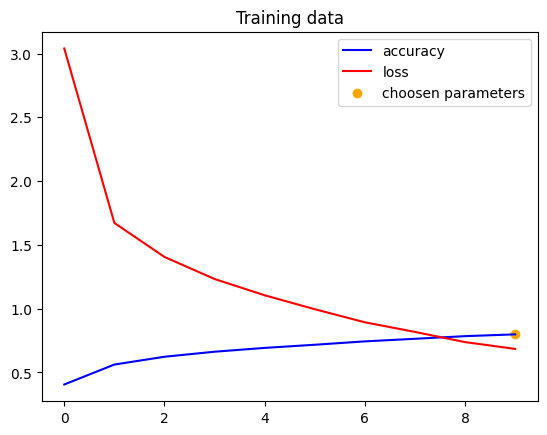

In [43]:
fig = plt.figure()
plt.plot(results.history['accuracy'], c='blue', label='accuracy')
plt.plot(results.history['loss'], c='red', label='loss')
plt.scatter(i,results.history['accuracy'][i], c='orange', marker='o', label='choosen parameters')
plt.title('Training data')
plt.legend(loc='upper right')
plt.show()

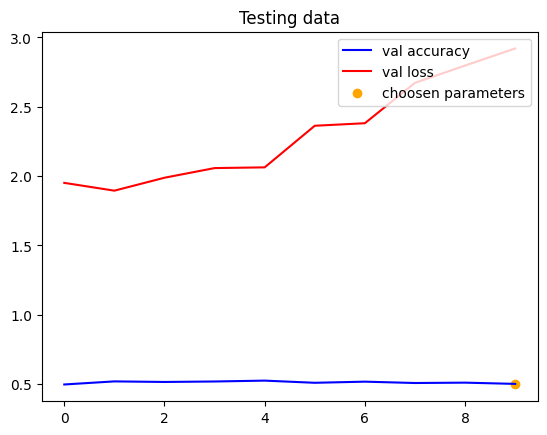

In [44]:
fig = plt.figure()
plt.plot(results.history['val_accuracy'], c='blue', label='val accuracy')
plt.plot(results.history['val_loss'], c='red', label='val loss')
plt.scatter(i,results.history['val_accuracy'][i], c='orange', marker='o', label='choosen parameters')
plt.title('Testing data')
plt.legend(loc='upper right')
plt.show()

Macarons Sample


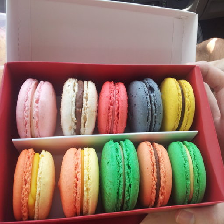

In [194]:
print("Macarons Sample")
macarons = load_img("/content/food-101/food-101/food-101/images/macarons/2428554.jpg",target_size=(224,224))
macarons

Pizza Sample


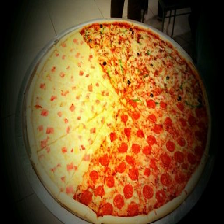

In [195]:
print("Pizza Sample")
pizza = load_img("/content/food-101/food-101/food-101/images/pizza/768276.jpg",target_size=(224,224,3))
pizza

Donuts Sample


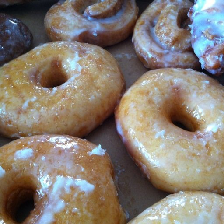

In [196]:
print("Donuts Sample")
donuts = load_img("/content/food-101/food-101/food-101/images/donuts/2563686.jpg",target_size=(224,224,3))
donuts

French Toast Sample


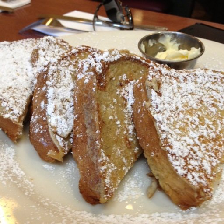

In [197]:
print("French Toast Sample")
toast = load_img("/content/food-101/food-101/food-101/images/french_toast/2769309.jpg",target_size=(224,224,3))
toast

French_fries Sample


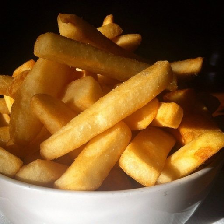

In [198]:
print("French_fries Sample")
fries = load_img("/content/food-101/food-101/food-101/images/french_fries/2246621.jpg",target_size=(224,224))
fries

Ice Cream Sample


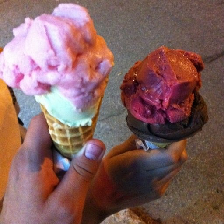

In [199]:
print("Ice Cream Sample")
ice = load_img("/content/food-101/food-101/food-101/images/ice_cream/579407.jpg",target_size=(224,224))
ice

Text(0.5, 1.0, 'Donuts')

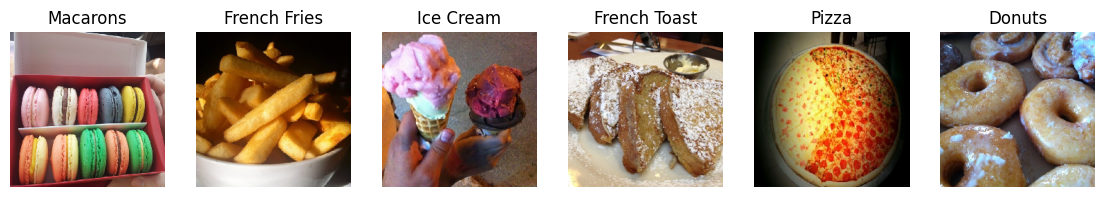

In [200]:
fig = plt.figure(figsize=(14,7))
# plt.grid=False
fig.add_subplot(1, 6, 1)
plt.axis('off')
plt.imshow(macarons)
plt.title("Macarons")
# _____________________________________________
fig.add_subplot(1, 6, 2)
plt.axis('off')
plt.imshow(fries)
plt.title("French Fries")
# _____________________________________________
fig.add_subplot(1, 6, 3)
plt.axis('off')
plt.imshow(ice)
plt.title("Ice Cream")
# _____________________________________________
fig.add_subplot(1, 6, 4)
plt.axis('off')
plt.imshow(toast)
plt.title("French Toast")
# _____________________________________________
fig.add_subplot(1, 6, 5)
plt.axis('off')
plt.imshow(pizza)
plt.title("Pizza")
# _____________________________________________
fig.add_subplot(1, 6, 6)
plt.axis('off')
plt.imshow(donuts)
plt.title("Donuts")

In [201]:
macarons = img_to_array(macarons)
fries = img_to_array(fries)
ice = img_to_array(ice)
pizza = img_to_array(pizza)
donuts = img_to_array(donuts)
toast = img_to_array(toast)
macarons = macarons/255
fries = fries/255
ice = ice/255
pizza = pizza/255
donuts = donuts/255
toast = toast/255
macarons = macarons.reshape(1,224,224,3)
fries = fries.reshape(1,224,224,3)
ice = ice.reshape(1,224,224,3)
pizza = pizza.reshape(1,224,224,3)
donuts = donuts.reshape(1,224,224,3)
toast = toast.reshape(1,224,224,3)

macarons.shape

(1, 224, 224, 3)

In [202]:
p1 = (mdl.predict(macarons)).argmax()

print("Class ",p1,": ",value[p1],sep='')
print(kcal[p1],'\nNote:',s)

1/1 [==============================] - 0s 82ms/step
Class 63: macarons
Macarons: ~4 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [203]:
p2 = (mdl.predict(fries)).argmax()

print("Class ",p2,": ",value[p2],sep='')
print(kcal[p2],'\nNote:',s)

1/1 [==============================] - 0s 60ms/step
Class 40: french_fries
French Fries: ~3.5 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [204]:
p3 = (mdl.predict(ice)).argmax()

print("Class ",p3,": ",value[p3],sep='')
print(kcal[p3],'\nNote:',s)

1/1 [==============================] - 0s 119ms/step
Class 58: ice_cream
Ice Cream: ~2 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [205]:
p4 = (mdl.predict(pizza)).argmax()

print("Class ",p4,": ",value[p4],sep='')
print(kcal[p4],'\nNote:',s)

1/1 [==============================] - 0s 109ms/step
Class 76: pizza
Pizza: ~2.5 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [206]:
p5 = (mdl.predict(donuts)).argmax()

print("Class ",p5,": ",value[p5],sep='')
print(kcal[p5],'\nNote:',s)

1/1 [==============================] - 0s 74ms/step
Class 31: donuts
Donuts: ~4 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [207]:
p6 = (mdl.predict(toast)).argmax()

print("Class ",p6,": ",value[p6],sep='')
print(kcal[p6],'\nNote:',s)

1/1 [==============================] - 0s 143ms/step
Class 42: french_toast
French Toast: ~2 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.
